In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)

In [ ]:
Player_information = pd.read_csv('Player_info_added_perday.csv', engine='python')
Player_action = pd.read_csv('Player_action_added_perday.csv', engine='python')
Group_activity = pd.read_csv('Group_activity.csv', engine='python')
labeled_accounts = pd.read_csv('labeled_accounts.csv', engine='python')

In [6]:
final = pd.read_csv('data_1_train.csv', engine='python')

# merge // get train and validation sets (get only the accounts labeled)

In [74]:
final = pd.merge(Player_information, Player_action, how='outer', on = "actor_account")
final = pd.merge(final, Group_activity, how='outer',  on = "actor_account")

In [11]:
final.fillna(0, inplace=True)
model_data = final.copy()
# model_data = pd.merge(final, labeled_accounts, how='inner', on = 'actor_account')
print(model_data.shape)

(30127, 52)


In [12]:
model_data.head()

,trade_go,trade_come,sell_to_shop,sell_to_person,mail_go,mail_come,invite,join,fight,friend_num,friend_num_change_count,too_much_gain,too_much_AP,trade_go_perday,buy_from_shop_perday,sell_to_shop_perday,mail_come_perday,invite_perday,join_perday,fight_perday,login_count,play_time,max_level,playtime_per_day,abyss,sit_count,exp_get_amout,money_get_count,teleport_count,killed_by_pc,killed_by_npc,reborn_count,sit_count_perday,login_total_day,item_get_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count,class
0,0,2,106,3,1,3,1,26,0,0,0,0,0,0.000000,2.714286,15.142857,0.428571,0.142857,3.714286,0.000000,140,278194,0,39742.00000,0,153,185380599,2319,199,31,20,37,21.857143,7,612.000000,331.285714,0.0,28.428571,6107,0.000550,0.000111,0.000072,0.021952,0.000715,1987.100000,666.371665,5677.428571,0.000000,0.264286,0.000000,15455.222220,0
1,1,0,59,0,0,25,6,17,0,0,0,0,0,0.166667,2.833333,9.833333,4.166667,1.000000,2.833333,0.000000,14,206335,0,34389.16667,0,77,45703651,813,193,25,42,49,12.833333,6,6093.333333,135.500000,0.0,32.166667,36535,0.000373,0.000121,0.000204,0.177066,0.000935,14738.214290,221.502174,5731.527778,0.000000,3.500000,0.000000,65.858602,0
2,0,3,157,0,0,1,4,23,0,0,0,0,0,0.000000,1.833333,26.166667,0.166667,0.666667,3.833333,0.000000,19,113732,35,18955.33333,0,194,51063526,465,168,16,28,32,32.333333,6,1957.833333,77.500000,0.0,28.000000,14141,0.001706,0.000141,0.000246,0.124336,0.001477,5985.894737,448.981166,3159.222222,1.842105,1.684211,5.542857,2992.947368,0
3,47,16,215,0,0,0,0,0,0,0,0,0,0,6.714286,0.714286,30.714286,0.000000,0.000000,0.000000,0.000000,12,535682,0,76526.00000,0,5,618893581,2007,15,0,0,0,0.714286,7,6972.857143,286.714286,0.0,2.142857,0,0.000009,0.000000,0.000000,0.000000,0.000028,44640.166670,1155.337646,10932.285710,0.000000,0.000000,0.000000,0.000000,0
4,4,9,115,0,5,29,51,45,13,0,0,0,0,0.571429,4.142857,16.428571,4.142857,7.285714,6.428571,1.857143,51,200852,0,28693.14286,0,174,206108846,1739,288,140,43,121,24.857143,7,7030.428571,248.428571,0.0,41.142857,17229,0.000866,0.000697,0.000214,0.085780,0.001434,3938.274510,1026.172734,4099.020408,0.000000,2.372549,0.000000,5285.578947,0


In [16]:
y = model_data.iloc[:, -1]
x = model_data.iloc[:, :-1]

In [17]:
x.head()

,trade_go,trade_come,sell_to_shop,sell_to_person,mail_go,mail_come,invite,join,fight,friend_num,friend_num_change_count,too_much_gain,too_much_AP,trade_go_perday,buy_from_shop_perday,sell_to_shop_perday,mail_come_perday,invite_perday,join_perday,fight_perday,login_count,play_time,max_level,playtime_per_day,abyss,sit_count,exp_get_amout,money_get_count,teleport_count,killed_by_pc,killed_by_npc,reborn_count,sit_count_perday,login_total_day,item_get_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count
0,0,2,106,3,1,3,1,26,0,0,0,0,0,0.000000,2.714286,15.142857,0.428571,0.142857,3.714286,0.000000,140,278194,0,39742.00000,0,153,185380599,2319,199,31,20,37,21.857143,7,612.000000,331.285714,0.0,28.428571,6107,0.000550,0.000111,0.000072,0.021952,0.000715,1987.100000,666.371665,5677.428571,0.000000,0.264286,0.000000,15455.222220
1,1,0,59,0,0,25,6,17,0,0,0,0,0,0.166667,2.833333,9.833333,4.166667,1.000000,2.833333,0.000000,14,206335,0,34389.16667,0,77,45703651,813,193,25,42,49,12.833333,6,6093.333333,135.500000,0.0,32.166667,36535,0.000373,0.000121,0.000204,0.177066,0.000935,14738.214290,221.502174,5731.527778,0.000000,3.500000,0.000000,65.858602
2,0,3,157,0,0,1,4,23,0,0,0,0,0,0.000000,1.833333,26.166667,0.166667,0.666667,3.833333,0.000000,19,113732,35,18955.33333,0,194,51063526,465,168,16,28,32,32.333333,6,1957.833333,77.500000,0.0,28.000000,14141,0.001706,0.000141,0.000246,0.124336,0.001477,5985.894737,448.981166,3159.222222,1.842105,1.684211,5.542857,2992.947368
3,47,16,215,0,0,0,0,0,0,0,0,0,0,6.714286,0.714286,30.714286,0.000000,0.000000,0.000000,0.000000,12,535682,0,76526.00000,0,5,618893581,2007,15,0,0,0,0.714286,7,6972.857143,286.714286,0.0,2.142857,0,0.000009,0.000000,0.000000,0.000000,0.000028,44640.166670,1155.337646,10932.285710,0.000000,0.000000,0.000000,0.000000
4,4,9,115,0,5,29,51,45,13,0,0,0,0,0.571429,4.142857,16.428571,4.142857,7.285714,6.428571,1.857143,51,200852,0,28693.14286,0,174,206108846,1739,288,140,43,121,24.857143,7,7030.428571,248.428571,0.0,41.142857,17229,0.000866,0.000697,0.000214,0.085780,0.001434,3938.274510,1026.172734,4099.020408,0.000000,2.372549,0.000000,5285.578947


## Simple EDA

In [134]:
# Login_count and Logout_count is virtually the same. Remove Logout_count
del model_data['logout_count']

# check if there is any nan values
for i in model_data.columns:
    model_data[model_data[i] == np.nan]

# There are inf values. Change it to max value in the column
for i in model_data.columns:
    model_data.loc[model_data[i] == np.inf, i] = np.nan
    model_data.loc[np.isnan(model_data[i]), i] = max(model_data[i])

In [135]:
# ip count and login_count is the same delete one of them
np.unique(model_data['ip_count']/model_data['login_count'])
del model_data['ip_count']

In [136]:
# login_day_count is all 1 except for one row
print(np.unique(model_data['login_day_count']), np.count_nonzero(model_data['login_day_count']))
del model_data['login_day_count']

[0. 1.] 13545


# Create new columns

In [137]:
# Measure how patient the player is
m = model_data['sit_count'] / model_data['play_time'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['sit_count/play_time'] = m

[[ 1.         -0.00922657]
 [-0.00922657  1.        ]]


In [138]:
# the lesser you get killed by a player the more likely you are to be a bot
m = model_data['killed_by_pc'] / model_data['play_time'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['killed_by_pc/play_time'] = m

[[1.         0.01840002]
 [0.01840002 1.        ]]


In [139]:
# similar with above
m = model_data['killed_by_npc'] / model_data['play_time'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['killed_by_npc/play_time'] = m

[[1.         0.01370232]
 [0.01370232 1.        ]]


In [140]:
# How organized the palyer is 
m = model_data['total_party_time'] / model_data['play_time'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['total-party_time/play_time'] = m

[[1.         0.02556977]
 [0.02556977 1.        ]]


In [141]:
# How impatient the player is
m = model_data['teleport_count'] / model_data['play_time'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['teleport_count/play_time'] = m

[[1.         0.01676791]
 [0.01676791 1.        ]]


In [18]:
# How often the player takes a real rest
m = model_data['play_time'] / model_data['login_count'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['play_time/login_count'] = m

[[1.         0.19888489]
 [0.19888489 1.        ]]


In [19]:
# How efficient the player is 
m = model_data['exp_get_amout'] / model_data['play_time'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['exp_get_amount/play_time'] = m

[[ 1.         -0.05513889]
 [-0.05513889  1.        ]]


In [20]:
# How efficient the player is 
m = model_data['playtime_per_day'] / model_data['login_total_day'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['playtime_per_day/login_total_day'] = m

[[1.         0.29334758]
 [0.29334758 1.        ]]


In [22]:
# How efficient the player is 
m = model_data['max_level'] / model_data['login_count'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['max_level/login_count'] = m

[[1.        0.0798561]
 [0.0798561 1.       ]]


In [23]:
# How efficient the player is 
m = model_data['reborn_count'] / model_data['login_count'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['reborn_count/login_count'] = m

[[1.        0.1931553]
 [0.1931553 1.       ]]


In [24]:
# Humans do not sit a a lot when the level is high level
m = model_data['sit_count'] / model_data['max_level'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['sit_count/max_level'] = m

[[1.         0.26090521]
 [0.26090521 1.        ]]


In [25]:
# Bots do not finish quest
m = model_data['play_time'] / model_data['question_count'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['play_time/question_count'] = m

KeyError: 'question_count'

## Do this automatically

In [11]:
for i in model_data:
    for j in model_data:
        m = model_data[j] / model_data[i] 
        m[m == np.inf] = 0
        m[np.isnan(m)] = 0
        x = np.corrcoef(m, y)[0][1]
        if abs(x) > 0.10:
            print(j, i, x)

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


play_time actor_account 0.1429112159792199
playtime_per_day actor_account 0.374902916720644
sit_count actor_account 0.12382668597059898
exp_get_amout actor_account -0.11735581386755152
money_get_count actor_account 0.18600997847588402
login_total_day actor_account -0.14706799590038958
sit_count_perday actor_account 0.2448697256229121
money_get_count_perday actor_account 0.24652498617026442
total_party_time actor_account -0.1144661282855969
class actor_account 0.999998943761308
play_time login_count 0.21377833904057414
max_level login_count 0.12131949826053076
playtime_per_day login_count 0.2299737849899315
sit_count login_count 0.13296430348824714
item_get_count login_count 0.10132663859370289
money_get_count login_count 0.20208648258481204
killed_by_npc login_count 0.1422495397675165
teleport_count login_count 0.15757080031561074
reborn_count login_count 0.19802240524118397
sit_count_perday login_count 0.2560791665157328
money_get_count_perday login_count 0.21433246395552258
teleport_

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2445: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


 max_level 0.1749315555885829
sit_count_perday max_level 0.2820181299244584
money_get_count_perday max_level 0.20494336144121972
class max_level 0.8089622940055391
play_time playtime_per_day -0.1469799785277186
exp_get_amout playtime_per_day -0.23710197455305837
killed_by_pc playtime_per_day -0.10465536027205485
killed_by_npc playtime_per_day -0.15749295175411449
teleport_count playtime_per_day -0.21435781215437716
teleport_count_perday playtime_per_day -0.10374121821420891
total_party_time playtime_per_day -0.1795549121185191
average_party_time playtime_per_day -0.1120352488179843
class playtime_per_day 0.48704627997149064
class sit_count 0.2039394597431027
sit_count_perday money_get_count 0.10208990698011089
class money_get_count 0.2176701706301851
actor_account use_portal_count -0.10986589940826162
use_portal_count use_portal_count -0.1360827634879556
login_total_day use_portal_count -0.10875532749871938
use_portal_count_perday use_portal_count -0.10153253945736175
teleport_count_pe

## Correlation Cofficient 
    1. Actor_account is a dummy variable. Any variable that has a lower contribution than actor_account should be deleted
    2. Exp_repair_count a single value of 1. This should be deleted

In [98]:
for i in range(0, len(x.columns)):
    if abs(np.corrcoef(x.iloc[:,i], y)[0,1]) > abs(np.corrcoef(x['actor_account'], y)[0,1]):
        print(x.columns[i], np.corrcoef(x.iloc[:,i], y)[0,1])

KeyError: 'actor_account'

In [149]:
del model_data['exp_repair_count']

In [31]:
x = model_data.drop(['class'], axis=1)

In [32]:
x.head()

,actor_account,login_count,play_time,avg_money,max_level,playtime_per_day,sit_count,exp_get_amout,item_get_count,money_get_count,abyss,use_portal_count,killed_by_pc,killed_by_npc,teleport_count,reborn_count,question_count,login_total_day,sit_count_perday,item_get_count_perday,exp_repair_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,guild_join_count,average_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count
0,20000000.0,25.0,216416.0,-31.818904,36.0,24046.22222,489.0,77894680.0,2712.0,499.0,0.0,0.0,11.0,83.0,194.0,72.0,86.0,9.0,54.333333,301.333333,0.0,55.444444,0.000000,21.555556,47052.0,1.0,2767.764706,0.002260,0.000051,0.000384,0.217415,0.000896,8656.640000,359.930319,2671.802469,1.440000,2.880000,13.583333,2516.465116
1,20000005.0,259.0,637926.0,124.849465,0.0,42528.40000,270.0,389149580.0,31149.0,4686.0,0.0,0.0,47.0,30.0,376.0,51.0,62.0,15.0,18.000000,2076.600000,0.0,312.400000,0.000000,25.066667,8862.0,0.0,1477.000000,0.000423,0.000074,0.000047,0.013892,0.000589,2463.034749,610.023075,2835.226667,0.000000,0.196911,0.000000,10289.129032
2,20000011.0,13.0,451598.0,0.537808,22.0,75266.33333,66.0,7602992.0,31446.0,281.0,0.0,0.0,5.0,14.0,57.0,18.0,6.0,6.0,11.000000,5241.000000,0.0,46.833333,0.000000,9.500000,0.0,0.0,0.000000,0.000146,0.000011,0.000031,0.000000,0.000126,34738.307692,16.835752,12544.388888,1.692308,1.384615,3.000000,75266.333333
3,20000016.0,38.0,401885.0,43.509962,42.0,28706.07143,153.0,80119427.0,61579.0,1596.0,0.0,0.0,32.0,75.0,343.0,75.0,5893.0,14.0,10.928571,4398.500000,0.0,114.000000,0.000000,24.500000,69458.0,0.0,3655.684211,0.000381,0.000080,0.000187,0.172831,0.000853,10575.921053,199.359088,2050.433674,1.105263,1.973684,3.642857,68.197013
4,20000025.0,222.0,424827.0,82.621717,0.0,28321.80000,552.0,322403224.0,29319.0,2415.0,0.0,8.0,214.0,111.0,776.0,241.0,131.0,15.0,36.800000,1954.600000,0.0,161.000000,0.533333,51.733333,37560.0,0.0,4173.333333,0.001299,0.000504,0.000261,0.088412,0.001827,1913.635135,758.904740,1888.120000,0.000000,1.085586,0.000000,3242.954198


## Lasso (Model Based Feature Selection)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

lasso = Lasso().fit(x_train, y_train)

print('{:.3f}'.format(lasso.score(x_train, y_train)))
print('{:.3f}'.format(lasso.score(x_test, y_test)))

0.402
0.351


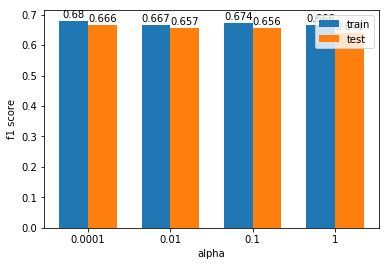

In [28]:
import matplotlib.pyplot as plt

alpha_set = [0.0001, 0.01, 0.1, 1]
max_inter_set = [10000000, 100000, 10000, 1000]

train_score = []
test_score = []
used_feature = []

for a, m in zip(alpha_set, max_inter_set):
    lasso_tr_y = lasso.predict(x_train)
    lasso_t_y = lasso.predict(x_test)
    lasso = Lasso(alpha=a, max_iter=m).fit(x_train, y_train)
    la_tr_score = np.round(f1_score((lasso.predict(x_train) > np.percentile(lasso_tr_y, 93)).astype(int), y_train), 3)
    la_te_score = np.round(f1_score((lasso.predict(x_test) > np.percentile(lasso_t_y, 93)).astype(int), y_test), 3)
    number_used = np.sum(lasso.coef_ != 0)

    train_score.append(la_tr_score)
    test_score.append(la_te_score)
    used_feature.append(number_used)

index = np.arange(len(alpha_set))
bar_width = 0.35
plt.bar(index, train_score, width=bar_width, label='train')
plt.bar(index+bar_width, test_score, width=bar_width, label='test')
plt.xticks(index+bar_width/2, alpha_set) # bar그래프 dodge를 하기 위해 기준값에 보정치를 더해줍니다.


for i, (ts, te) in enumerate(zip(train_score, test_score)):
    plt.text(i, ts+0.01, str(ts), horizontalalignment='center')
    plt.text(i+bar_width, te+0.01, str(te), horizontalalignment='center')

plt.legend(loc=1, )
plt.xlabel('alpha')
plt.ylabel('f1 score')
plt.show()

## Results of Feature Selection by Lasso

In [29]:
# when alpha is 1

lasso = Lasso(alpha=1, max_iter=1000).fit(x_train, y_train)

lasso_tr_y = lasso.predict(x_train)
lasso_t_y = lasso.predict(x_test)

for i in range(0, len(x.columns)):
    if abs(lasso.coef_[i]) > abs(lasso.coef_[0]):
        print(x.columns[i], lasso.coef_[i])

login_count -1.977309104138967e-05
play_time -5.911793914487563e-07
playtime_per_day 1.4650465008132796e-05
sit_count 1.3385168406809441e-05
item_get_count 1.0870738188206215e-07
money_get_count 3.7533298416670353e-06
question_count 1.4676819445911677e-06
item_get_count_perday -1.2880504739080875e-06
money_get_count_perday 1.4976728480823023e-05
total_party_time -5.061474945419863e-07
average_party_time 4.1634508724331144e-07
play_time/login_count -2.439160547775559e-06
exp_get_amount/play_time -3.1682470385681153e-07
playtime_per_day/login_total_day -4.319720275322339e-06
play_time/question_count 1.4201674192651498e-07


In [30]:
# when alpha is 0.1

lasso = Lasso(alpha=0.1, max_iter=10000).fit(x_train, y_train)

lasso_tr_y = lasso.predict(x_train)
lasso_t_y = lasso.predict(x_test)

for i in range(0, len(x.columns)):
    if abs(lasso.coef_[i]) > abs(lasso.coef_[0]):
        print(x.columns[i], lasso.coef_[i])

login_count -3.8384734044428564e-05
play_time -4.80568957970697e-07
avg_money 1.0940366126766273e-07
playtime_per_day 1.3118009672837293e-05
sit_count -2.2435351731782725e-05
item_get_count 1.1495182363729012e-07
money_get_count 1.4610138106626876e-06
killed_by_pc -0.00010705324615066966
killed_by_npc -9.230832800461319e-05
teleport_count -7.751557705263443e-05
reborn_count 0.0001991752600274585
question_count 1.93732526596471e-06
sit_count_perday 0.00037092927925565786
item_get_count_perday -1.197028877601875e-06
money_get_count_perday 4.111105666425973e-05
total_party_time -3.457291193595125e-07
average_party_time 2.1260350210300914e-07
play_time/login_count -3.016894407048299e-06
exp_get_amount/play_time -5.0802681194946e-06
playtime_per_day/login_total_day -3.883524119558114e-06
sit_count/max_level 0.000437797028541357
play_time/question_count 1.2181226293233534e-07


In [31]:
# when alpha is 0.01

lasso = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)

lasso_tr_y = lasso.predict(x_train)
lasso_t_y = lasso.predict(x_test)

for i in range(0, len(x.columns)):
    if abs(lasso.coef_[i]) > abs(lasso.coef_[0]):
        print(x.columns[i], lasso.coef_[i])

login_count -4.229082071517483e-05
play_time -5.75780458095937e-07
avg_money 8.407988856722924e-08
max_level 1.2894269003021226e-05
playtime_per_day 1.4327779356064953e-05
sit_count -2.759367766361783e-05
money_get_count 1.3143008329733187e-06
abyss -2.9727890680686627e-05
killed_by_pc -0.00014561540224038944
killed_by_npc -0.00014997770129598285
teleport_count 0.00014473654724101392
reborn_count 0.00028784560027827566
question_count 1.8818601086103964e-06
login_total_day 0.00018059408745233147
sit_count_perday 0.00040637211991879457
item_get_count_perday -6.455172104536484e-07
money_get_count_perday 4.158573996498543e-05
teleport_count_perday -0.0036418963678776246
total_party_time -3.3116926866920607e-07
average_party_time 1.9900194636768495e-07
play_time/login_count -3.2829152817520507e-06
exp_get_amount/play_time 9.993189210671973e-07
playtime_per_day/login_total_day -3.693944829449038e-06
sit_count/max_level 0.0006237265030740312
play_time/question_count 1.1179727175955828e-07


In [33]:
model_data.head()

,actor_account,login_count,play_time,avg_money,max_level,playtime_per_day,sit_count,exp_get_amout,item_get_count,money_get_count,abyss,use_portal_count,killed_by_pc,killed_by_npc,teleport_count,reborn_count,question_count,login_total_day,sit_count_perday,item_get_count_perday,exp_repair_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,guild_join_count,average_party_time,class,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count
0,20000000.0,25.0,216416.0,-31.818904,36.0,24046.22222,489.0,77894680.0,2712.0,499.0,0.0,0.0,11.0,83.0,194.0,72.0,86.0,9.0,54.333333,301.333333,0.0,55.444444,0.000000,21.555556,47052.0,1.0,2767.764706,0.0,0.002260,0.000051,0.000384,0.217415,0.000896,8656.640000,359.930319,2671.802469,1.440000,2.880000,13.583333,2516.465116
1,20000005.0,259.0,637926.0,124.849465,0.0,42528.40000,270.0,389149580.0,31149.0,4686.0,0.0,0.0,47.0,30.0,376.0,51.0,62.0,15.0,18.000000,2076.600000,0.0,312.400000,0.000000,25.066667,8862.0,0.0,1477.000000,0.0,0.000423,0.000074,0.000047,0.013892,0.000589,2463.034749,610.023075,2835.226667,0.000000,0.196911,0.000000,10289.129032
2,20000011.0,13.0,451598.0,0.537808,22.0,75266.33333,66.0,7602992.0,31446.0,281.0,0.0,0.0,5.0,14.0,57.0,18.0,6.0,6.0,11.000000,5241.000000,0.0,46.833333,0.000000,9.500000,0.0,0.0,0.000000,1.0,0.000146,0.000011,0.000031,0.000000,0.000126,34738.307692,16.835752,12544.388888,1.692308,1.384615,3.000000,75266.333333
3,20000016.0,38.0,401885.0,43.509962,42.0,28706.07143,153.0,80119427.0,61579.0,1596.0,0.0,0.0,32.0,75.0,343.0,75.0,5893.0,14.0,10.928571,4398.500000,0.0,114.000000,0.000000,24.500000,69458.0,0.0,3655.684211,0.0,0.000381,0.000080,0.000187,0.172831,0.000853,10575.921053,199.359088,2050.433674,1.105263,1.973684,3.642857,68.197013
4,20000025.0,222.0,424827.0,82.621717,0.0,28321.80000,552.0,322403224.0,29319.0,2415.0,0.0,8.0,214.0,111.0,776.0,241.0,131.0,15.0,36.800000,1954.600000,0.0,161.000000,0.533333,51.733333,37560.0,0.0,4173.333333,0.0,0.001299,0.000504,0.000261,0.088412,0.001827,1913.635135,758.904740,1888.120000,0.000000,1.085586,0.000000,3242.954198


# Creating Final Training Data

In [150]:
final_data = pd.DataFrame

In [155]:
# Through inspection of each columns
final_data = model_data[['actor_account', 'login_count', 'play_time', 'max_level', "playtime_per_day", 'abyss', 'sit_count', 'exp_get_amout', 'money_get_count', 'teleport_count', 'killed_by_pc', 'killed_by_npc', 'reborn_count', 'sit_count_perday', 'login_total_day', 'item_get_count_perday', 'money_get_count_perday', 'use_portal_count_perday', 'teleport_count_perday', 'total_party_time', 'sit_count/play_time', 'killed_by_pc/play_time', 'killed_by_npc/play_time', 'total-party_time/play_time', 'teleport_count/play_time', 'play_time/login_count', 'exp_get_amount/play_time', 'playtime_per_day/login_total_day', 'max_level/login_count', 'reborn_count/login_count', 'sit_count/max_level', 'play_time/question_count']]

In [154]:
final_data.columns

Index(['login_count', 'play_time', 'max_level', 'playtime_per_day', 'abyss',
       'sit_count', 'exp_get_amout', 'money_get_count', 'teleport_count',
       'killed_by_pc', 'killed_by_npc', 'reborn_count', 'sit_count_perday',
       'login_total_day', 'item_get_count_perday', 'money_get_count_perday',
       'use_portal_count_perday', 'teleport_count_perday', 'total_party_time',
       'sit_count/play_time', 'killed_by_pc/play_time',
       'killed_by_npc/play_time', 'total-party_time/play_time',
       'teleport_count/play_time', 'play_time/login_count',
       'exp_get_amount/play_time', 'playtime_per_day/login_total_day',
       'max_level/login_count', 'reborn_count/login_count',
       'sit_count/max_level', 'play_time/question_count'],
      dtype='object')

In [128]:
final_data['class'] = y

C:\Users\HeeYoung Jung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [156]:
final_data.to_csv('data_perday_3_test.csv')